# Import Modules

In [15]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf
from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
#### Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 4
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 4
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   4
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  4
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 4


Your risk factor is 1.0


In [3]:
print(client_risk)

1.0


In [25]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 5


# Data Input for Risk Parity Model

In [5]:

# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=252*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2019-11-25'

'2023-05-08'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-26,-0.7809%,0.1416%,1.3023%,0.1661%,0.1375%,-0.0730%,0.1414%,0.5250%,0.3028%,0.4206%,...,-0.9183%,-0.0996%,0.2917%,0.0911%,0.8147%,1.3893%,0.3345%,-0.0805%,0.6839%,-0.2467%
2019-11-27,1.3432%,-0.1237%,1.2004%,-0.1540%,0.0000%,0.7309%,-0.0387%,-0.0426%,0.3508%,0.0292%,...,0.2528%,0.3989%,-0.0970%,0.5573%,0.2424%,0.3102%,0.1746%,0.5135%,0.8592%,-0.0582%
2019-11-29,-0.2203%,-0.1239%,-0.9739%,0.0000%,-0.1716%,-0.0907%,0.0000%,-0.6116%,-0.2927%,-0.3449%,...,-1.0086%,-0.1655%,-0.4610%,-0.2940%,-0.0322%,-0.3866%,-0.0951%,-0.3506%,-0.6491%,-0.8297%
2019-12-02,-1.1562%,-0.1101%,-1.0662%,-0.2615%,-0.2581%,0.0136%,-0.2709%,-1.1525%,-0.5846%,-1.2208%,...,0.0000%,-0.6302%,-1.6456%,-1.4292%,0.2258%,-1.8370%,-0.6503%,-0.4422%,-0.8248%,0.4256%
2019-12-03,-1.7830%,0.4534%,-0.6533%,0.5364%,0.3105%,-1.0212%,0.4656%,0.4155%,-0.1479%,1.3946%,...,-1.4943%,-1.4019%,-1.0906%,-0.8861%,-0.1609%,0.8171%,0.2714%,-0.2221%,-1.0046%,-0.7893%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,-0.0530%,-1.0240%,-3.2243%,-1.0284%,-0.4501%,0.4931%,-0.9751%,-0.4713%,0.0435%,-2.5654%,...,-1.1277%,-0.2713%,0.5400%,0.0597%,0.0775%,-0.9271%,0.1740%,0.5167%,-0.9874%,-3.1012%
2023-05-02,-0.6191%,0.9727%,1.5483%,0.9844%,0.8426%,-1.3054%,0.8534%,-1.6062%,-0.8410%,1.6401%,...,-4.3483%,-2.2672%,-1.0444%,-0.9343%,-0.2710%,-1.7112%,-1.2156%,-0.4321%,0.1025%,-3.9853%
2023-05-03,-0.6467%,0.4415%,0.0193%,0.4197%,-0.0815%,-0.8102%,0.3038%,0.1321%,-0.0565%,-0.1233%,...,-1.8880%,-1.1445%,-0.3819%,-0.8427%,-0.8151%,-0.6257%,-0.2784%,-0.1347%,-0.7915%,-1.9709%


In [6]:
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(fear_factor)

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(fear_factor)

elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(fear_factor)
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(fear_factor)
    else:
        print(f"Number isn't between 0 and 1")
       

0


# Risk Partiy Model

In [7]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


In [8]:
print(fear_factor)

0


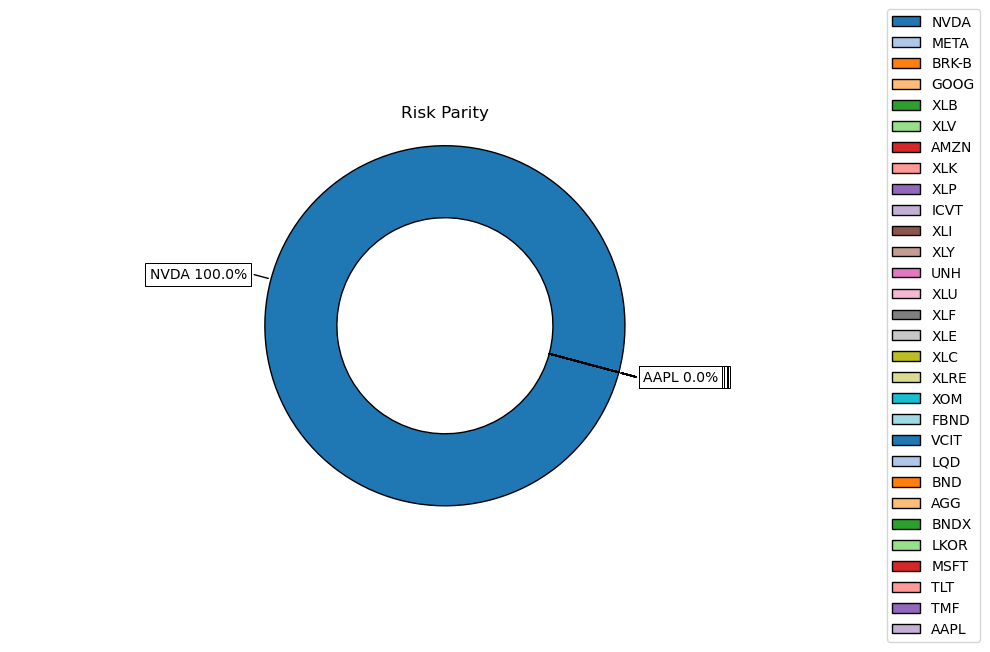

In [9]:
ax = rp.plot_pie(w=w, title='Risk Parity', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [10]:
#w.to_csv(Path("w.csv"))

# Monte Carlo Simulation

In [62]:
#Read the csv created from the risk parity module and create a dataframe with the tickers and weights in the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)
portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,0.0000%
1,AGG,0.0000%
2,AMZN,0.0000%
3,BND,0.0000%
4,BNDX,0.0000%


In [63]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list
for i in weights_list:
    print(type(i))
    

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [41]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG              \
                  open       close daily_return        open       close   
Date                                                                      
2019-11-25  6567.7498%  6513.9709%          NaN 11291.0004% 10474.0677%   
2019-11-26  6673.5001%  6463.1073%     -0.7808% 11308.9996% 10488.8992%   
2019-11-27  6639.4997%  6549.9199%      1.3432% 11302.9999% 10475.9216%   
2019-11-29  6665.0002%  6535.4912%     -0.2203% 11301.0002% 10462.9440%   
2019-12-02  6681.7497%  6459.9281%     -1.1562% 11230.9998% 10451.4229%   
...                ...         ...          ...         ...         ...   
2023-05-02 17008.9996% 16853.9993%     -0.6191%  9895.9999%  9965.0002%   
2023-05-03 16950.0000% 16744.9997%     -0.6467%  9988.9999% 10008.9996%   
2023-05-04 16488.9999% 16578.9993%     -0.9913%  9976.9997%  9997.0001%   
2023-05-05 17097.9996% 17357.0007%      4.6927%  9963.9999%  9965.0002%   
2023-05-08 17247.9996% 17350.0000%     -0.0403%  9920.9999%  9909.9998%   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2019-11-25          NaN  8766.2498%  8869.2001%          NaN 8426.0002%  ...   
2019-11-26      0.1416%  8899.6002%  8984.7000%      1.3023% 8440.0002%  ...   
2019-11-27     -0.1237%  9005.0003%  9092.5499%      1.2004% 8430.9998%  ...   
2019-11-29     -0.1239%  9088.9000%  9004.0001%     -0.9739% 8429.0001%  ...   
2019-12-02     -0.1101%  9022.0001%  8908.0002%     -1.0662% 8383.0002%  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-02      0.9727% 10147.0001% 10362.9997%      1.5483% 7333.0002%  ...   
2023-05-03      0.4415% 10373.9998% 10365.0002%      0.0193% 7401.9997%  ...   
2023-05-04     -0.1199% 10404.0001% 10400.0000%      0.3377% 7391.9998%  ...   
2023-05-05     -0.3201% 10426.9997% 10566.0004%      1.5962% 7380.9998%  ...   
2023-05-08     -0.5519% 10504.0001% 10583.0002%      0.1609% 7350.0000%  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2019-11-25          NaN  9866.0004%  9345.3011%          NaN 12086.0001%   
2019-11-26      0.3345%  9940.0002%  9337.7815%     -0.0805% 12133.0002%   
2019-11-27      0.1746%  9947.0001%  9385.7246%      0.5134% 12258.0002%   
2019-11-29     -0.0951%  9958.0002%  9352.8214%     -0.3506% 12333.0002%   
2019-12-02     -0.6503%  9969.0002%  9311.4594%     -0.4422% 12254.0001%   
...                 ...         ...         ...          ...         ...   
2023-05-02     -1.2156% 13400.0000% 13363.9999%     -0.4321% 14617.9993%   
2023-05-03     -0.2784% 13425.9995% 13346.0007%     -0.1347% 14594.0002%   
2023-05-04      0.7639% 13289.9994% 13239.9994%     -0.7943% 14541.0004%   
2023-05-05      0.6415% 13327.0004% 13358.9996%      0.8988% 14563.0005%   
2023-05-08     -0.3042% 13338.9999% 13330.0003%     -0.2171% 14763.9999%   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2019-11-25 11752.1767%          NaN  6937.0003%  5738.1615%          NaN  
2019-11-26 11832.5462%      0.6839%  6891.9998%  5724.0040%     -0.2467%  
2019-11-27 11934.2163%      0.8592%  6876.0002%  5720.6741%     -0.0582%  
2019-11-29 11856.7528%     -0.6491%  6833.0002%  5673.2105%     -0.8297%  
2019-12-02 11758.9554%     -0.8248%  6850.0000%  5697.3579%      0.4256%  
...                ...          ...         ...         ...          ...  
2023-05-02 14655.0003%      0.1025% 11394.0002% 11009.9998%     -3.9853%  
2023-05-03 14538.9999%     -0.7

In [64]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=10,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG              \
                 open      close daily_return        open       close   
Date                                                                    
2019-11-25 6567.7498% 6513.9709%          NaN 11291.0004% 10474.0677%   
2019-11-26 6673.5001% 6463.1073%     -0.7808% 11308.9996% 10488.8992%   
2019-11-27 6639.4997% 6549.9199%      1.3432% 11302.9999% 10475.9216%   
2019-11-29 6665.0002% 6535.4912%     -0.2203% 11301.0002% 10462.9440%   
2019-12-02 6681.7497% 6459.9281%     -1.1562% 11230.9998% 10451.4229%   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2019-11-25          NaN 8766.2498% 8869.2001%          NaN 8426.0002%  ...   
2019-11-26      0.1416% 8899.6002% 8984.7000%      1.3023% 8440.0002%  ...   
2019-11-27     -0.1237% 9005.0003% 9092.5499%      1.2004% 8430.9998%  ...   
2019-11-29     -0.1239% 9088.9000% 9004.0001%     -0.9739% 8429.0001%  ...   
2019-12-02     -0.1101% 9022.0001% 8908.0002%     -1.0662% 8383.0002%  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2019-11-25          NaN 9866.0004% 9345.3011%          NaN 12086.0001%   
2019-11-26      0.3345% 9940.0002% 9337.7815%     -0.0805% 12133.0002%   
2019-11-27      0.1746% 9947.0001% 9385.7246%      0.5134% 12258.0002%   
2019-11-29     -0.0951% 9958.0002% 9352.8214%     -0.3506% 12333.0002%   
2019-12-02     -0.6503% 9969.0002% 9311.4594%     -0.4422% 12254.0001%   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2019-11-25 11752.1767%          NaN 6937.0003% 5738.1615%          NaN  
2019-11-26 11832.5462%      0.6839% 6891.9998% 5724.0040%     -0.2467%  
2019-11-27 11934.2163%      0.8592% 6876.0002% 5720.6741%     -0.0582%  
2019-11-29 11856.7528%     -0.6491% 6833.0002% 5673.2105%     -0.8297%  
2019-12-02 11758.9554%     -0.8248% 6850.0000% 5697.3579%      0.4256%  

[5 rows x 90 columns]

In [27]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,...,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%,100.0000%
1,103.1960%,97.2472%,100.3897%,103.4758%,100.9084%,103.6546%,101.6979%,97.3284%,102.4709%,95.0368%,...,97.7268%,98.1334%,97.7090%,94.3297%,101.4612%,91.7068%,98.1723%,101.1964%,102.0615%,99.0567%
2,101.8670%,95.3808%,100.2595%,104.1582%,104.9232%,108.1183%,98.9260%,102.8577%,102.2084%,95.3734%,...,96.7226%,101.4829%,95.9836%,90.6140%,102.2194%,88.8365%,97.3228%,106.0185%,107.0905%,98.1523%
3,105.9660%,93.6753%,101.8638%,114.3245%,110.3958%,112.3695%,96.8647%,102.7224%,103.3679%,97.4078%,...,97.5620%,106.6999%,92.8565%,86.4696%,103.5702%,93.0193%,98.4385%,109.5307%,109.2058%,94.8761%
4,106.8923%,92.1077%,100.4036%,115.5137%,103.9025%,110.5427%,95.1378%,104.6692%,102.7546%,100.0982%,...,94.1392%,105.3041%,95.3591%,86.8212%,100.5295%,92.4903%,97.7977%,110.7410%,117.7652%,96.9354%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5931.1272%,847.5624%,2313.6697%,1682.8877%,2389.8634%,4383.8526%,4107.2814%,515.9718%,526.2089%,1302.2413%,...,328.5340%,5417.9353%,2289.0723%,1806.4454%,2790.1773%,1488.0261%,89.3169%,1318.7599%,3748.2870%,154.7819%
1257,5865.1322%,773.9019%,2304.3695%,1722.3307%,2306.8673%,4183.6738%,3902.0228%,517.3328%,528.8651%,1322.5108%,...,331.5472%,5582.5377%,2296.6984%,1896.9054%,2612.6567%,1418.3726%,86.4025%,1381.5176%,3651.7544%,141.9677%
1258,6151.5012%,806.6069%,2261.2870%,1598.8148%,2414.4723%,4364.2615%,3753.5188%,485.6426%,523.3142%,1306.8838%,...,324.0759%,5508.2990%,2332.9826%,1967.4182%,2673.8960%,1453.2690%,84.0921%,1397.4416%,3940.8822%,138.6419%
1259,5941.4260%,808.8670%,2252.6218%,1614.7696%,2367.0103%,4092.2785%,3901.8001%,493.6386%,540.9004%,1336.9187%,...,325.8374%,5634.4786%,2410.0265%,1909.2286%,2711.8567%,1384.9350%,87.1845%,1353.5423%,3915.7213%,141.4505%


<AxesSubplot:title={'center':'30 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

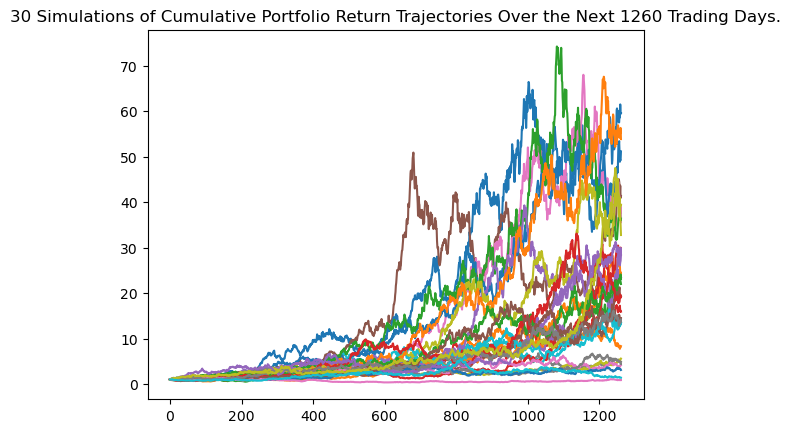

In [31]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 30 Simulations'}, ylabel='Frequency'>

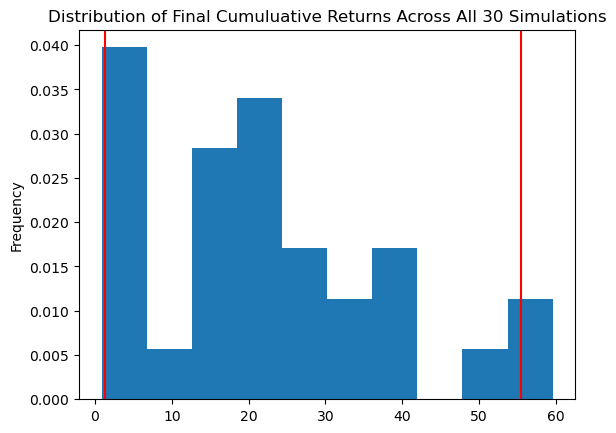

In [29]:
thirty_year_simulation.plot_distribution()

In [34]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count          3000.0000%
mean           2234.4013%
std            1609.6676%
min              87.3003%
25%             960.8648%
50%            2069.4676%
75%            3172.2984%
max            5956.7640%
95% CI Lower    124.8366%
95% CI Upper   5544.6785%
Name: 1260, dtype: float64